<a target="_blank" href="https://medium.com/@hasan.mhowwala/harmonizing-audio-analysis-with-gpt-4-a-symphony-of-exploration-transformation-and-discovery-9f9ade423100"><img src="https://github-readme-medium-recent-article.vercel.app/medium/@username/index" alt="Medium Article">

In [3]:
!unzip /content/audio.zip -d /content/audio_data

Archive:  /content/audio.zip
   creating: /content/audio_data/audio/
  inflating: /content/audio_data/audio/1-100032-A-0.wav  
  inflating: /content/audio_data/audio/1-100038-A-14.wav  
  inflating: /content/audio_data/audio/1-100210-A-36.wav  
  inflating: /content/audio_data/audio/1-100210-B-36.wav  
  inflating: /content/audio_data/audio/1-101296-A-19.wav  
  inflating: /content/audio_data/audio/1-101296-B-19.wav  
  inflating: /content/audio_data/audio/1-101336-A-30.wav  
  inflating: /content/audio_data/audio/1-101404-A-34.wav  
  inflating: /content/audio_data/audio/1-103298-A-9.wav  
  inflating: /content/audio_data/audio/1-103995-A-30.wav  
  inflating: /content/audio_data/audio/1-103999-A-30.wav  
  inflating: /content/audio_data/audio/1-104089-A-22.wav  
  inflating: /content/audio_data/audio/1-104089-B-22.wav  
  inflating: /content/audio_data/audio/1-105224-A-22.wav  
  inflating: /content/audio_data/audio/1-110389-A-0.wav  
  inflating: /content/audio_data/audio/1-110537-A

In [8]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize audio
def visualize_audio(file_path):
    y, sr = librosa.load(file_path)

    # Displaying the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # Displaying the spectrogram
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

# Directory where the audio files are extracted
audio_dir = '/content/audio_data'

# Getting the list of all audio files in the directory
audio_files = [f for f in os.listdir(audio_dir) if os.path.isfile(os.path.join(audio_dir, f))]

# Visualizing each audio file
for audio_file in audio_files:
    file_path = os.path.join(audio_dir, audio_file)
    print(f"Visualizing audio file: {audio_file}")
    visualize_audio(file_path)


In [9]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Directory where the audio files are extracted
audio_dir = '/content/audio_data'

# Getting the list of all audio files in the directory
audio_files = [f for f in os.listdir(audio_dir) if os.path.isfile(os.path.join(audio_dir, f))]

# Loading and visualizing the first audio file
if audio_files:
    file_path = os.path.join(audio_dir, audio_files[0])
    y, sr = librosa.load(file_path)

    # Displaying the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
else:
    print("No audio files found in the specified directory.")

No audio files found in the specified directory.


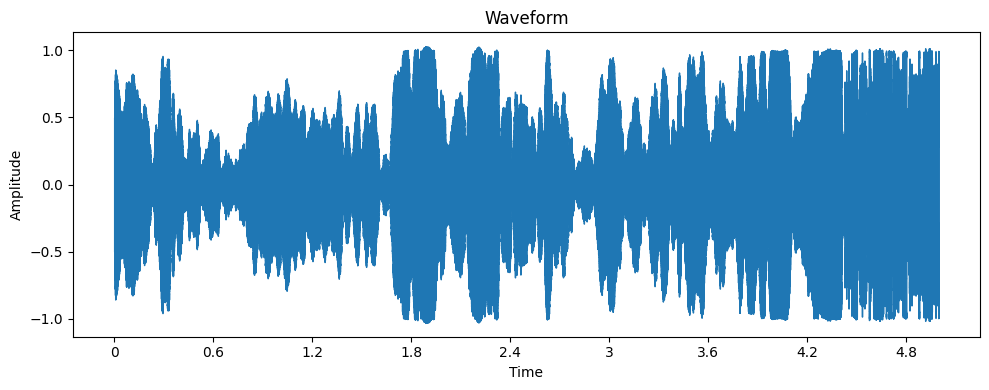

In [10]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to recursively get all audio files in a directory
def get_audio_files(dir_path):
    audio_files = []
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            if file.endswith(('.wav', '.mp3')):  # Add more formats if needed
                audio_files.append(os.path.join(root, file))
    return audio_files

# Directory where the audio files are extracted
audio_dir = '/content/audio_data'

# Getting the list of all audio files in the directory and subdirectories
audio_files = get_audio_files(audio_dir)

# Loading and visualizing the first audio file
if audio_files:
    file_path = audio_files[0]
    y, sr = librosa.load(file_path)

    # Displaying the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
else:
    print("No audio files found in the specified directory.")

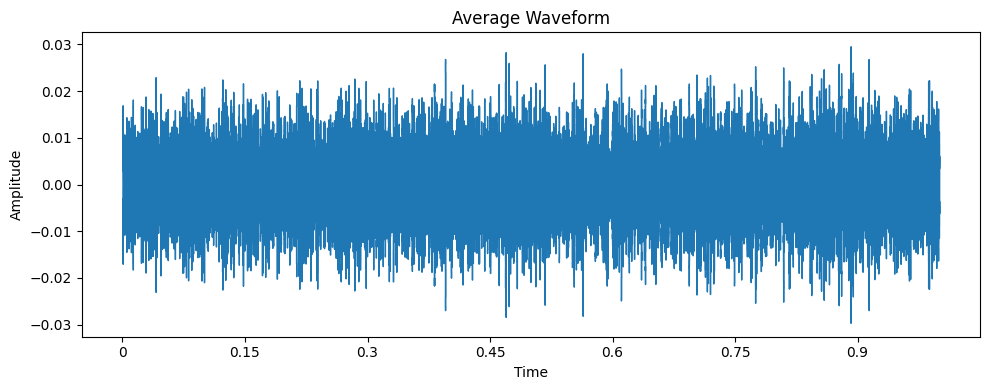

In [11]:
import numpy as np

def load_and_pad_audio(file_path, target_length):
    y, sr = librosa.load(file_path)
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))  # Pad with zeros
    else:
        y = y[:target_length]  # Trim the audio
    return y, sr

# Define the target length (you can adjust this based on your analysis)
target_length = 22050  # 1 second for a sample rate of 22050

# Load, pad, and sum the waveforms
sum_waveform = np.zeros(target_length)
num_files = len(audio_files)

for audio_file in audio_files:
    y, sr = load_and_pad_audio(audio_file, target_length)
    sum_waveform += y

# Calculate the average waveform
average_waveform = sum_waveform / num_files

# Visualize the average waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(average_waveform, sr=sr)
plt.title('Average Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

<ipython-input-12-f9a2dbc3aec9>:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


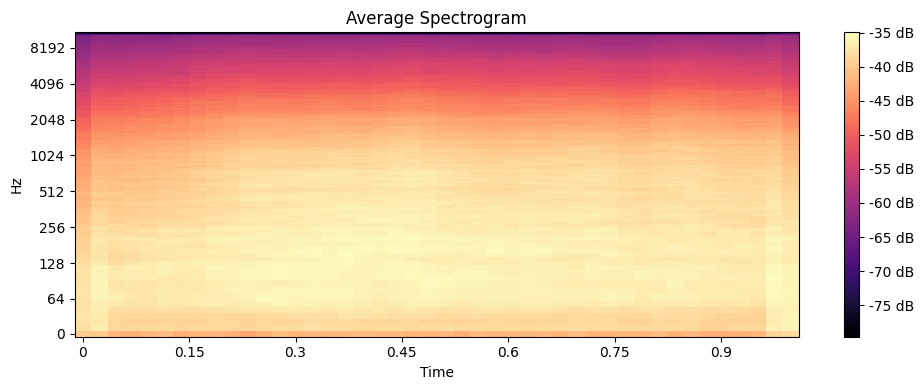

In [12]:
def calculate_spectrogram(y, sr):
    return librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

# Load, pad, and sum the spectrograms
sum_spectrogram = np.zeros((1025, target_length // 512 + 1))  # Adjust the size based on your analysis

for audio_file in audio_files:
    y, sr = load_and_pad_audio(audio_file, target_length)
    spectrogram = calculate_spectrogram(y, sr)
    sum_spectrogram += spectrogram

# Calculate the average spectrogram
average_spectrogram = sum_spectrogram / num_files

# Visualize the average spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(average_spectrogram, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Average Spectrogram')
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
import librosa

def preprocess_audio(file_path, target_length=22050):
    # Load and pad audio files to have consistent length
    y, sr = librosa.load(file_path)
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))
    else:
        y = y[:target_length]

    # Volume normalization (optional based on your needs)
    y = librosa.util.normalize(y)

    # Feature extraction: MFCC (you can extract other features if needed)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    return mfccs

# Applying preprocessing to all audio files and storing features in a list
features = [preprocess_audio(file_path) for file_path in audio_files]

# Now, 'features' contains the preprocessed MFCCs for each audio file

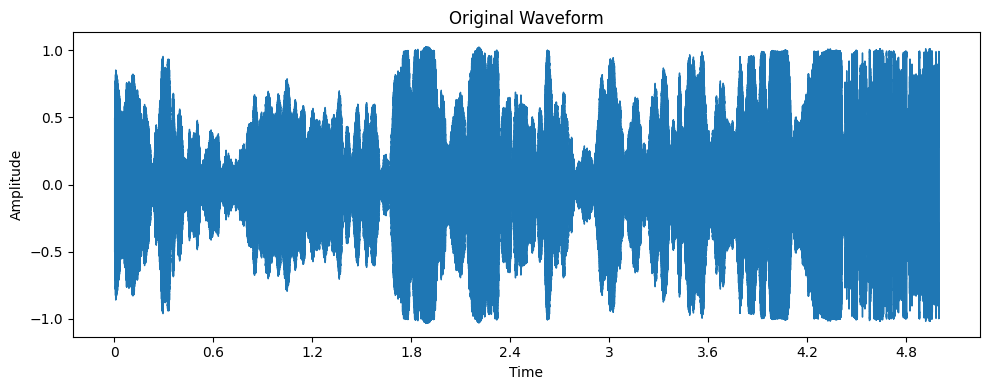

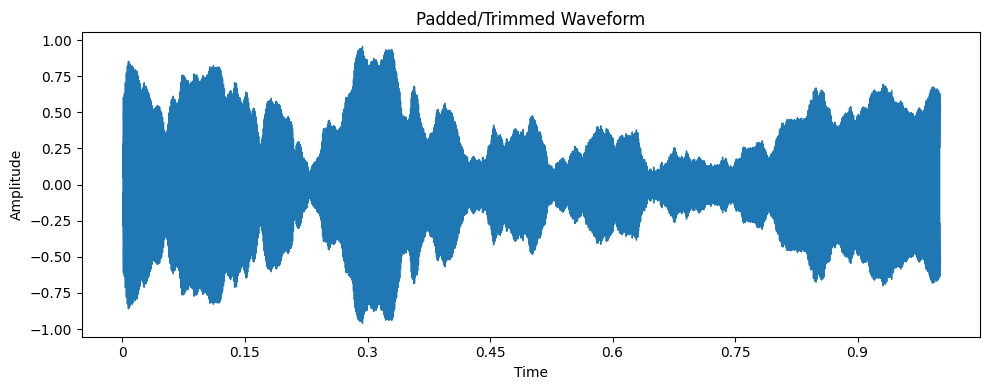

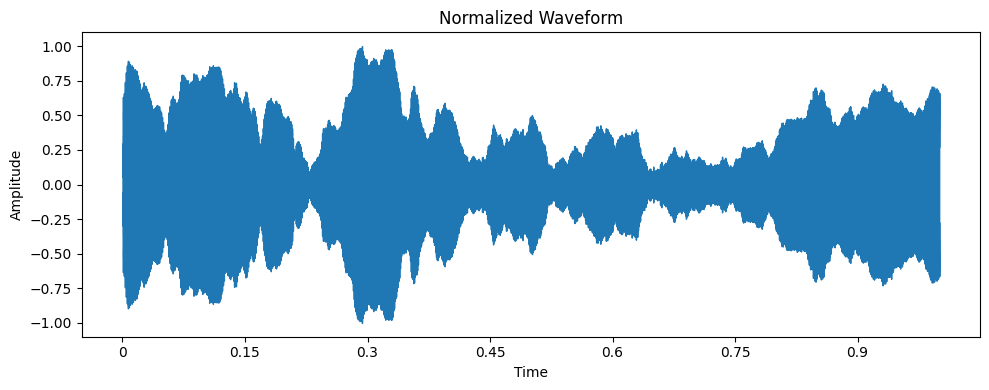

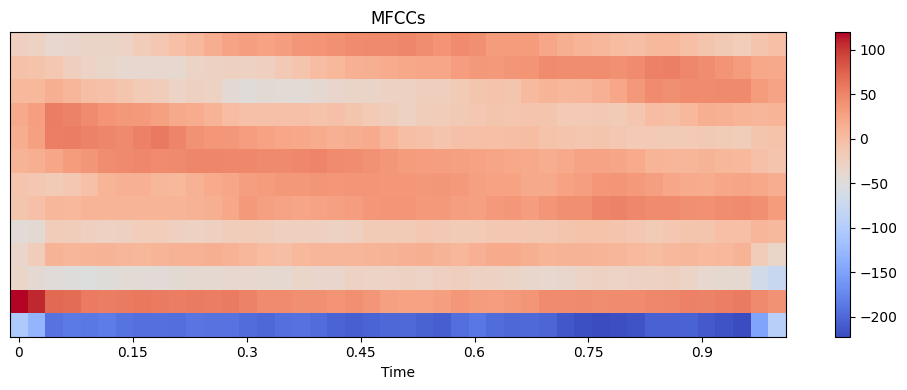

In [14]:
import matplotlib.pyplot as plt

def visualize_waveform(y, title="Waveform"):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def visualize_mfcc(mfccs, title="MFCCs"):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

def preprocess_and_visualize(file_path, target_length=22050):
    # Load the audio file
    y, sr = librosa.load(file_path)
    visualize_waveform(y, title="Original Waveform")

    # Handling different audio lengths
    if len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)))
    else:
        y = y[:target_length]

    visualize_waveform(y, title="Padded/Trimmed Waveform")

    # Volume normalization
    y = librosa.util.normalize(y)
    visualize_waveform(y, title="Normalized Waveform")

    # Feature extraction: MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    visualize_mfcc(mfccs)

    return mfccs

# Applying preprocessing and visualization to the first audio file as an example
features_example = preprocess_and_visualize(audio_files[0])

In [16]:
# Averaging the MFCCs over time
features_averaged = [np.mean(f, axis=1) for f in features]

# Converting the list of arrays into a 2D array
features_2d = np.array(features_averaged)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_2d)

# Now, 'features_scaled' contains the scaled features ready for model building


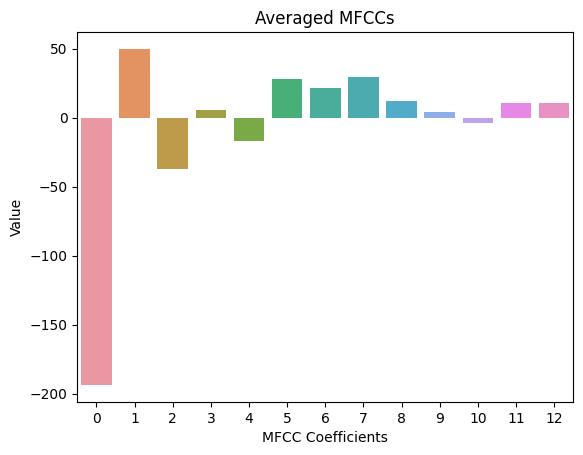

In [17]:
import seaborn as sns

# Visualizing the averaged MFCCs for the first audio file as an example
sns.barplot(x=np.arange(features_2d.shape[1]), y=features_2d[0])
plt.title('Averaged MFCCs')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


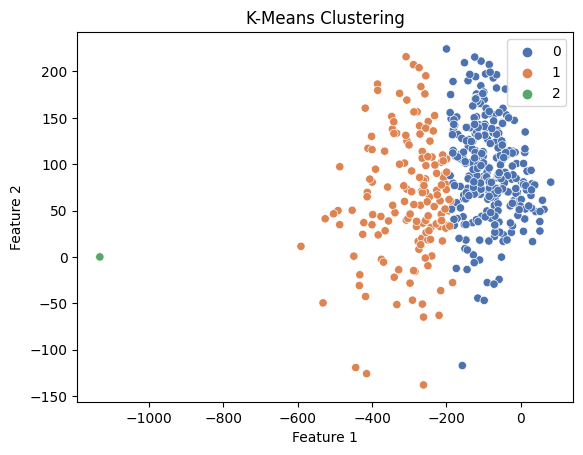

In [19]:
from sklearn.cluster import KMeans
import seaborn as sns

# Number of clusters to form
num_clusters = 3  # You can adjust this based on your analysis or use the Elbow Method

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_2d)

# Visualizing the clusters
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=clusters, palette="deep")
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


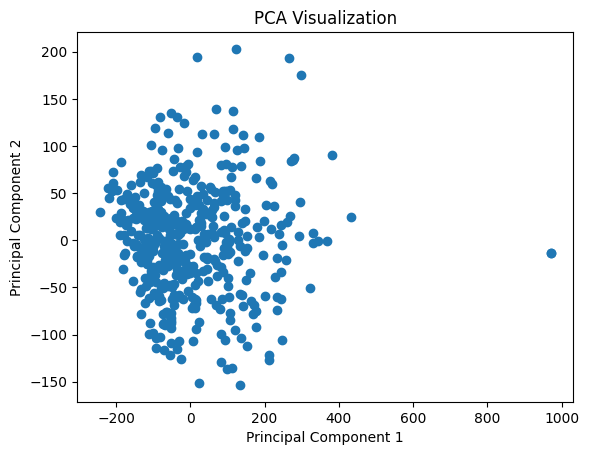

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA and reducing the dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_2d)

# Visualizing the Principal Components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.stats import mode

# Number of clusters to form
num_clusters = 3

# K-Means
kmeans = KMeans(n_clusters=num_clusters)
kmeans_clusters = kmeans.fit_predict(features_2d)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
agglomerative_clusters = agglomerative.fit_predict(features_2d)

# DBSCAN
dbscan = DBSCAN(eps=3)  # You might need to adjust the eps parameter
dbscan_clusters = dbscan.fit_predict(features_2d)

# Combining the outputs (Majority Voting)
combined_clusters = mode(np.array([kmeans_clusters, agglomerative_clusters, dbscan_clusters]), axis=0)[0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


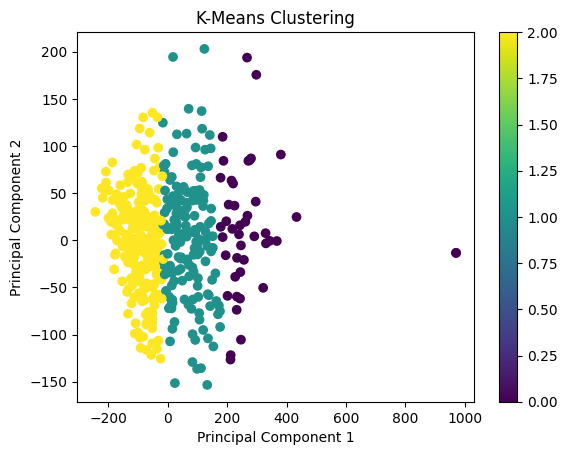

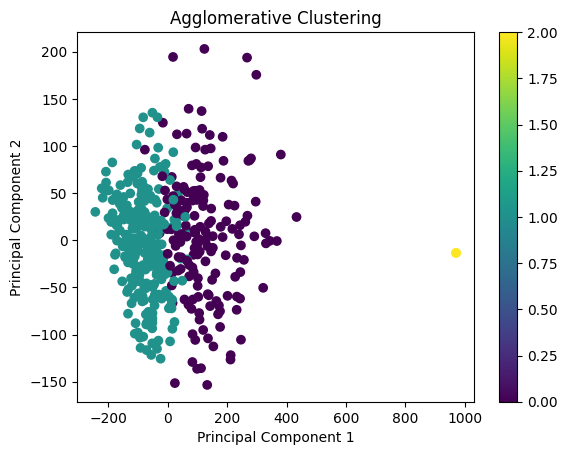

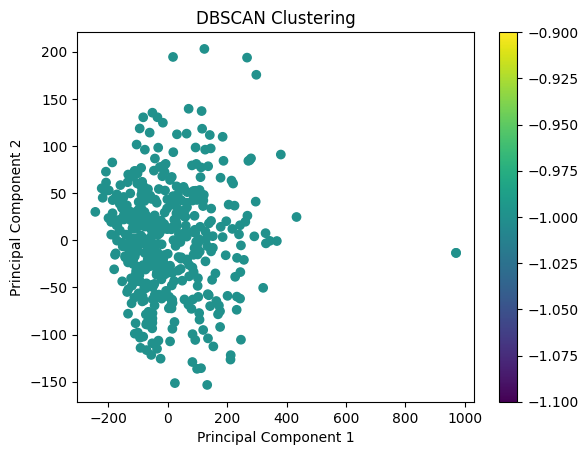

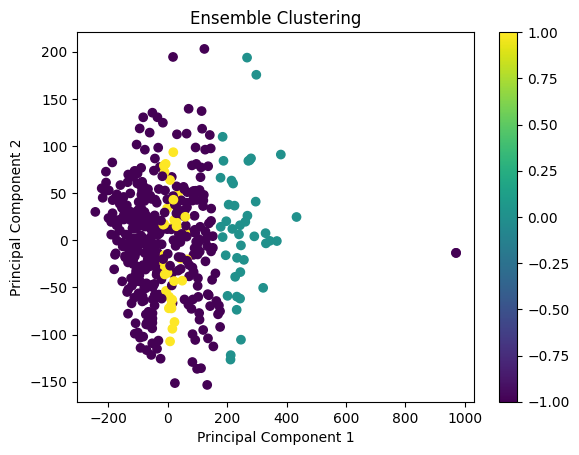

In [22]:
import matplotlib.pyplot as plt

def visualize_clusters(clusters, title="Clusters"):
    plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

# Visualizing clusters from each model
visualize_clusters(kmeans_clusters, title="K-Means Clustering")
visualize_clusters(agglomerative_clusters, title="Agglomerative Clustering")
visualize_clusters(dbscan_clusters, title="DBSCAN Clustering")

# Visualizing clusters from the ensemble result
visualize_clusters(combined_clusters.ravel(), title="Ensemble Clustering")